In [18]:
#!pip install requests pandas
import requests
import pandas as pd

def fetch_crypto_data():
    url = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=50&page=1&sparkline=false'

    response = requests.get(url)
    data = response.json()

    # Create a pandas DataFrame
    df = pd.DataFrame(data)

    return df

# Fetch data
df = fetch_crypto_data()

# Print the first 5 rows
print(df.head())

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3       solana    sol    Solana   
4  binancecoin    bnb       BNB   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...      98760.000   
1  https://coin-images.coingecko.com/coins/images...       3474.330   
2  https://coin-images.coingecko.com/coins/images...          1.001   
3  https://coin-images.coingecko.com/coins/images...        261.140   
4  https://coin-images.coingecko.com/coins/images...        673.520   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  1953794292375                1            2073639601957   63806495600   
1   418115400596                2             418115400596   38102379782   
2   132276623700                3             132276623700  124133565298   
3   123931814855                4             153725819918

In [19]:
#!pip install pycoingecko
import pandas as pd
from pycoingecko import CoinGeckoAPI
import openpyxl as op

# Initialize CoinGecko API client
cg = CoinGeckoAPI()

# Get the list of top 50 coins
coins_list = cg.get_coins_markets(vs_currency='usd', per_page=50, page=1)

# Extract relevant data into a list of dictionaries
data = []
for coin in coins_list:
    data.append({
        'Name': coin['name'],
        'Symbol': coin['symbol'],
        'Current Price': coin['current_price'],
        'Price Change 24h': coin['price_change_24h'],
        'Price Change Percentage 24h': coin['price_change_percentage_24h'],
        'Market Cap': coin['market_cap'],
        'Total Volume': coin['total_volume']
    })

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Save the DataFrame to a CSV file
df.to_csv('top_50_cryptocurrencies.csv', index=False)

                                     Name  Symbol  Current Price  \
0                                 Bitcoin     btc   98725.000000   
1                                Ethereum     eth    3483.380000   
2                                  Tether    usdt       1.001000   
3                                  Solana     sol     261.240000   
4                                     BNB     bnb     674.190000   
5                                     XRP     xrp       1.550000   
6                                Dogecoin    doge       0.463101   
7                                 Cardano     ada       1.100000   
8                                    USDC    usdc       0.999948   
9                       Lido Staked Ether   steth    3495.120000   
10                                   TRON     trx       0.222907   
11                              Avalanche    avax      42.750000   
12                              Shiba Inu    shib       0.000027   
13                                Toncoin     to

In [20]:
df.shape 

(50, 7)

In [21]:
df.head

<bound method NDFrame.head of                                      Name  Symbol  Current Price  \
0                                 Bitcoin     btc   98725.000000   
1                                Ethereum     eth    3483.380000   
2                                  Tether    usdt       1.001000   
3                                  Solana     sol     261.240000   
4                                     BNB     bnb     674.190000   
5                                     XRP     xrp       1.550000   
6                                Dogecoin    doge       0.463101   
7                                 Cardano     ada       1.100000   
8                                    USDC    usdc       0.999948   
9                       Lido Staked Ether   steth    3495.120000   
10                                   TRON     trx       0.222907   
11                              Avalanche    avax      42.750000   
12                              Shiba Inu    shib       0.000027   
13                

In [22]:
df.columns

Index(['Name', 'Symbol', 'Current Price', 'Price Change 24h',
       'Price Change Percentage 24h', 'Market Cap', 'Total Volume'],
      dtype='object')

In [23]:
df.dtypes

Name                            object
Symbol                          object
Current Price                  float64
Price Change 24h               float64
Price Change Percentage 24h    float64
Market Cap                       int64
Total Volume                     int64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         50 non-null     object 
 1   Symbol                       50 non-null     object 
 2   Current Price                50 non-null     float64
 3   Price Change 24h             50 non-null     float64
 4   Price Change Percentage 24h  50 non-null     float64
 5   Market Cap                   50 non-null     int64  
 6   Total Volume                 50 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ KB


In [25]:
df.describe().style.background_gradient(cmap="Blues")

,Current Price,Price Change 24h,Price Change Percentage 24h,Market Cap,Total Volume
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4355.602710,68.077775,11.708689,66000405480.120003,6834006794.760000
std,19464.475253,223.556626,10.772678,279805863755.534119,20017996736.009537
min,0.000022,-0.129956,-1.488700,3179638638.000000,3155080.000000
25%,0.999954,0.022243,4.475367,4014252155.500000,361274062.000000
50%,5.725000,0.316091,10.991630,7778089604.000000,1138391982.500000
75%,39.762500,4.340000,15.829052,16031340248.500000,2543564909.250000
max,98725.000000,1259.280000,57.805200,1953525506400.000000,126537736030.000000


In [26]:
if df.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n") 
else:
    print("Fortunately, there aren't missing values in the dataset.")

Fortunately, there aren't missing values in the dataset.


In [27]:
# Z-Score Normalization 
# Calculate Z-scores for each feature

Z_Scores = (df - df.mean()) / df.std()
Threshold = 3    # Is a commonly used standard
Outliers = (Z_Scores > Threshold) | (Z_Scores < -Threshold)

# Check if there are any outliers
if Outliers.any().any():
    print("Outliers detected in the dataset. Removing them...")
    
    # Remove Outliers
    Data = df[~Outliers.any(axis=1)]
    Data.reset_index(drop=True, inplace=True)
    
    print("Outliers removed. Data shape:", Data.shape)
else:
    print("No outliers detected in the dataset.")

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (46, 7)


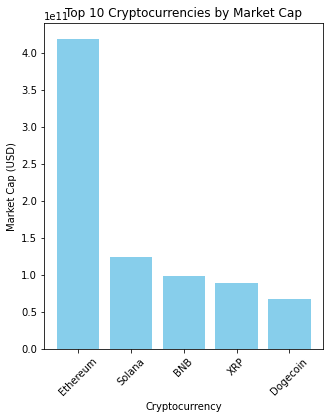

In [28]:
# Visualize the top 10 cryptocurrencies by market cap
import matplotlib.pyplot as plt
top_5 = Data.nlargest(5, 'Market Cap')
plt.figure(figsize=(5, 6))
plt.bar(top_5['Name'], top_5['Market Cap'], color='skyblue')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Cap (USD)')
plt.title('Top 10 Cryptocurrencies by Market Cap')
plt.xticks(rotation=45)
plt.show()

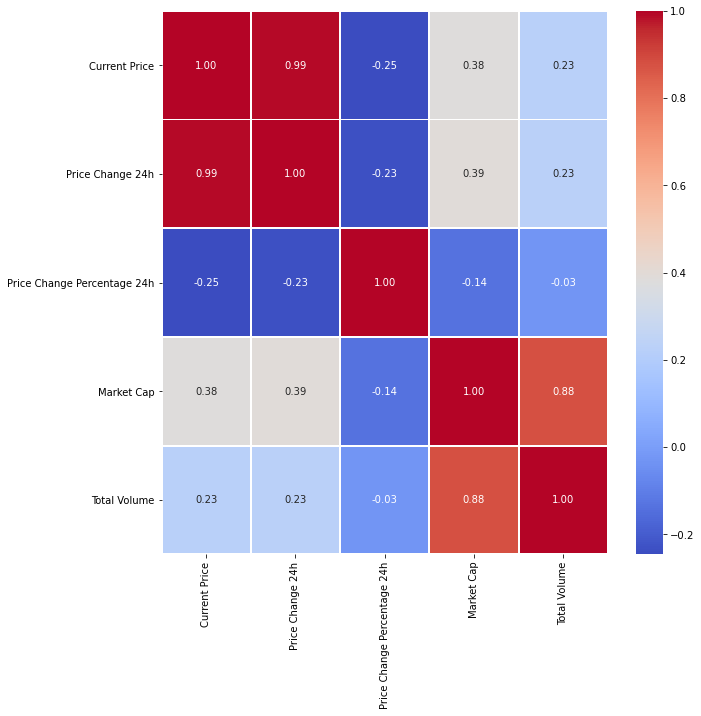

In [29]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(Data.corr(), annot=True, linewidths=0.9, fmt=".2f", cmap="coolwarm")
plt.show()

In [30]:
# Calculate the average price
average_price = Data['Current Price'].mean()

print("Average Price of Top 50 Cryptocurrencies:", average_price)

Average Price of Top 50 Cryptocurrencies: 447.23213566304344


In [31]:
# Find the cryptocurrency with the highest 24-hour price increase
highest_gainer = Data.loc[Data['Price Change Percentage 24h'].idxmax()]
print("Highest 24h Gainer:")
print(highest_gainer)

# Find the cryptocurrency with the highest 24-hour price decrease
highest_loser = Data.loc[Data['Price Change Percentage 24h'].idxmin()]
print("\nHighest 24h Loser:")
print(highest_loser)

Highest 24h Gainer:
Name                              VeChain
Symbol                                vet
Current Price                    0.043874
Price Change 24h                 0.011731
Price Change Percentage 24h      36.49556
Market Cap                     3556932589
Total Volume                    535668097
Name: 38, dtype: object

Highest 24h Loser:
Name                            LEO Token
Symbol                                leo
Current Price                         8.6
Price Change 24h                -0.129956
Price Change Percentage 24h       -1.4887
Market Cap                     7949056638
Total Volume                      3155080
Name: 19, dtype: object


In [32]:
def fetch_crypto_data():
    cg = CoinGeckoAPI()
    coins_list = cg.get_coins_markets(vs_currency='usd', per_page=50, page=1)

    data = []
    for coin in coins_list:
        data.append({
            'Name': coin['name'],
            'Symbol': coin['symbol'],
            'Current Price': coin['current_price'],
            'Price Change 24h': coin['price_change_24h'],
            'Price Change Percentage 24h': coin['price_change_percentage_24h'],
            'Market Cap': coin['market_cap'],
            'Total Volume': coin['total_volume']
        })

    df = pd.DataFrame(data)
    return df

In [33]:
workbook = op.Workbook()
sheet = workbook.active

# Write the header row
sheet.append(['Name', 'Symbol', 'Current Price', 'Price Change 24h', 'Price Change Percentage 24h', 'Market Cap', 'Total Volume'])

# Save the Excel file
workbook.save('crypto_data.xlsx')

import time
def export_to_excel(df):
    df.to_excel('crypto_data.xlsx', index=False)
    
    df = fetch_crypto_data()
export_to_excel(df)

In [34]:
import schedule
def schedule_update():
    schedule.every().second.do(lambda: update_excel(fetch_crypto_data()))
    while True:
        schedule.run_pending()
        time.sleep(1)
        
    schedule_update(df)